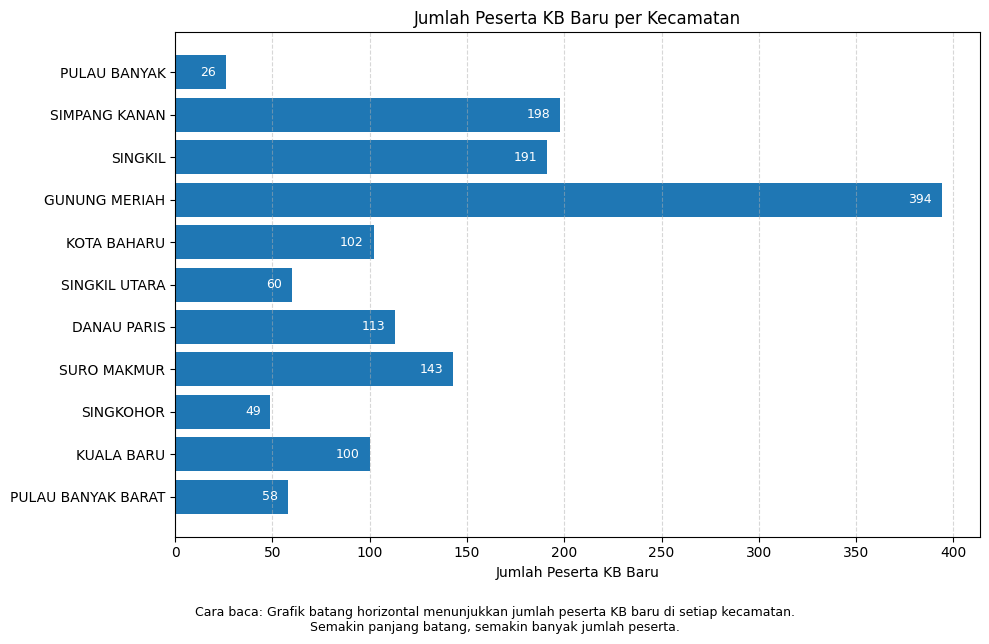

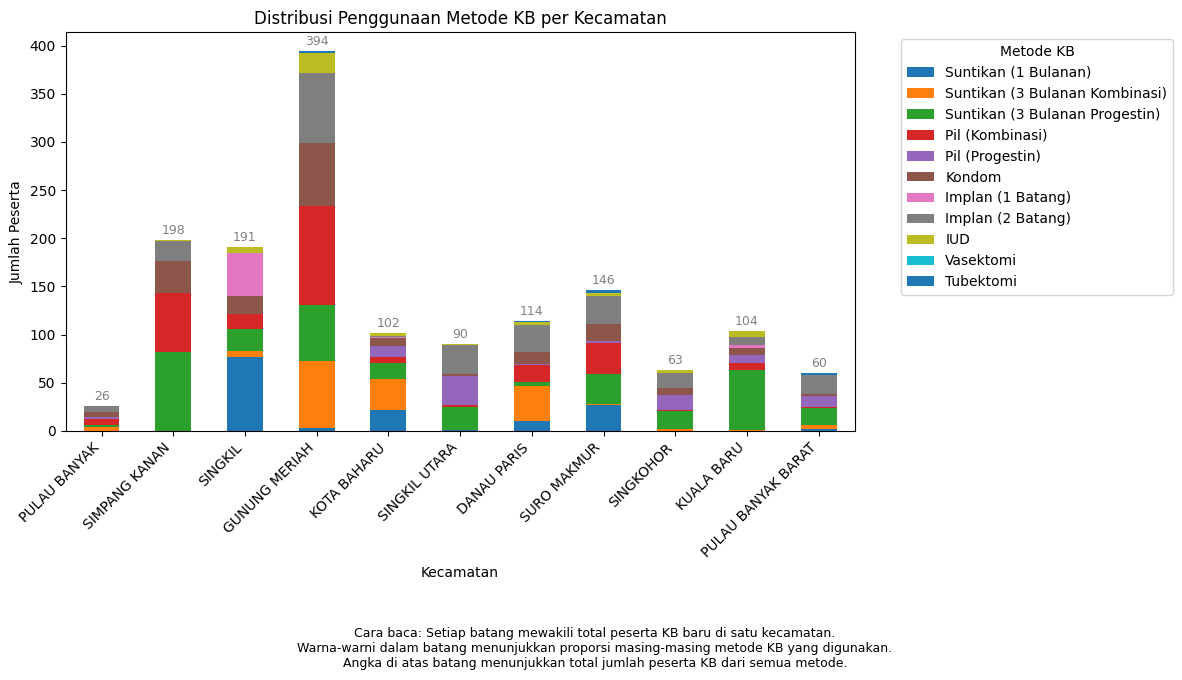

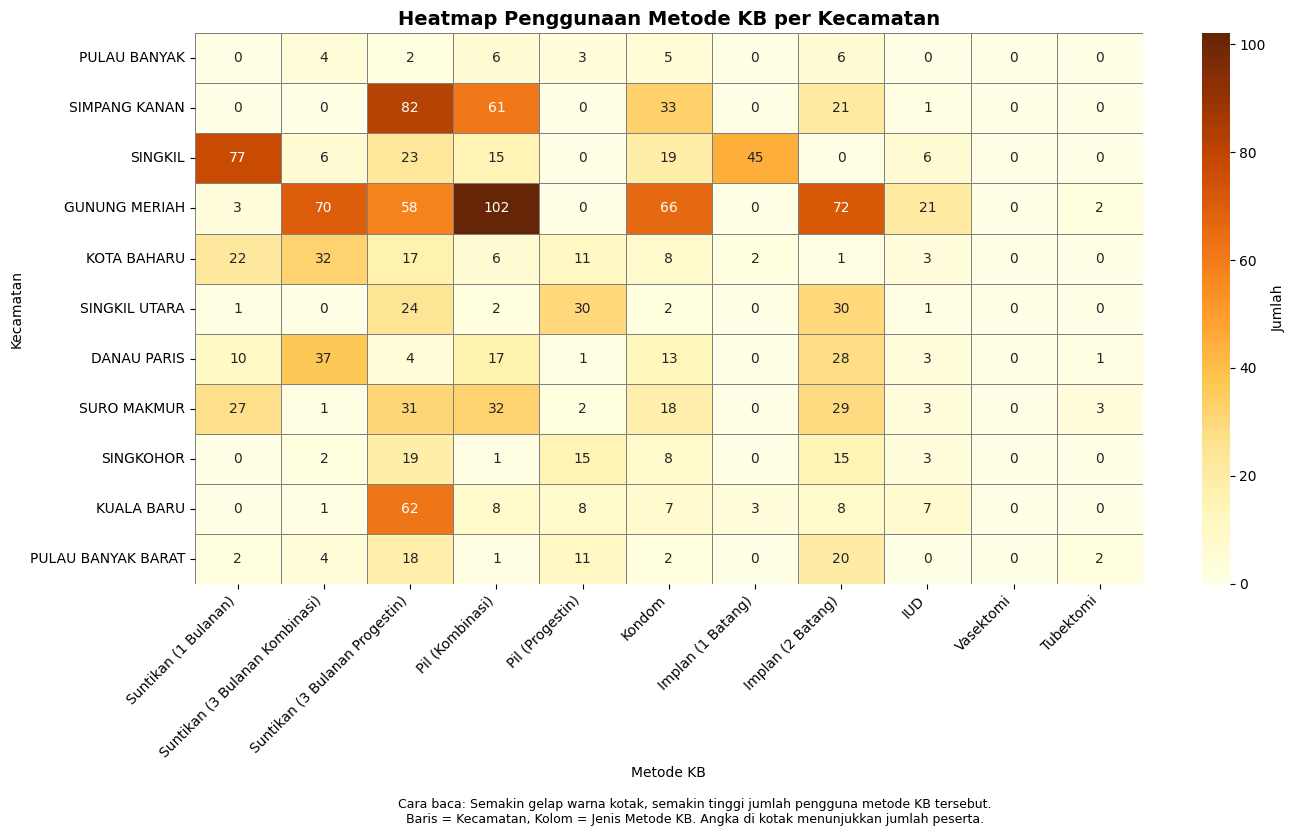

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Buat folder tujuan jika belum ada
output_folder = "output_kb_baru_kumulatif"
os.makedirs(output_folder, exist_ok=True)

# Data
data = {
    'Kecamatan': [
        'PULAU BANYAK', 'SIMPANG KANAN', 'SINGKIL', 'GUNUNG MERIAH', 'KOTA BAHARU',
        'SINGKIL UTARA', 'DANAU PARIS', 'SURO MAKMUR', 'SINGKOHOR', 'KUALA BARU', 'PULAU BANYAK BARAT'
    ],
    'Jumlah Peserta KB Baru': [26, 198, 191, 394, 102, 60, 113, 143, 49, 100, 58],
    'Suntikan (1 Bulanan)': [0, 0, 77, 3, 22, 1, 10, 27, 0, 0, 2],
    'Suntikan (3 Bulanan Kombinasi)': [4, 0, 6, 70, 32, 0, 37, 1, 2, 1, 4],
    'Suntikan (3 Bulanan Progestin)': [2, 82, 23, 58, 17, 24, 4, 31, 19, 62, 18],
    'Pil (Kombinasi)': [6, 61, 15, 102, 6, 2, 17, 32, 1, 8, 1],
    'Pil (Progestin)': [3, 0, 0, 0, 11, 30, 1, 2, 15, 8, 11],
    'Kondom': [5, 33, 19, 66, 8, 2, 13, 18, 8, 7, 2],
    'Implan (1 Batang)': [0, 0, 45, 0, 2, 0, 0, 0, 0, 3, 0],
    'Implan (2 Batang)': [6, 21, 0, 72, 1, 30, 28, 29, 15, 8, 20],
    'IUD': [0, 1, 6, 21, 3, 1, 3, 3, 3, 7, 0],
    'Vasektomi': [0]*11,
    'Tubektomi': [0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 2]
}
df = pd.DataFrame(data)

# --- Grafik 1: Bar chart horizontal jumlah peserta baru ---
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Kecamatan'], df['Jumlah Peserta KB Baru'], color='#1f77b4')
plt.xlabel('Jumlah Peserta KB Baru')
plt.title('Jumlah Peserta KB Baru per Kecamatan')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Tambahkan label nilai DI DALAM batang
for bar in bars:
    width = bar.get_width()
    plt.text(width - 5,                         # sedikit ke kiri dari ujung
             bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             va='center', ha='right', fontsize=9, color='white')

plt.figtext(0.5, -0.06,
            "Cara baca: Grafik batang horizontal menunjukkan jumlah peserta KB baru di setiap kecamatan.\n"
            "Semakin panjang batang, semakin banyak jumlah peserta.",
            ha='center', fontsize=9)
plt.tight_layout()
plt.savefig(f"{output_folder}/peserta_kb_baru_per_kecamatan.png", bbox_inches='tight')
plt.show()


# --- Grafik 2: Stacked bar chart distribusi metode KB ---
df_metode_bar = df.drop(columns=['Jumlah Peserta KB Baru']).set_index('Kecamatan')
ax = df_metode_bar.plot(kind='bar', stacked=True, figsize=(12, 6), legend=False)

plt.title("Distribusi Penggunaan Metode KB per Kecamatan")
plt.ylabel("Jumlah Peserta")
plt.xlabel("Kecamatan")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metode KB", bbox_to_anchor=(1.05, 1), loc='upper left')

# Tambahkan label total di atas setiap batang
totals = df_metode_bar.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 3,  # 3 agar tidak nempel ke batang
            str(int(total)),
            ha='center', va='bottom',
            fontsize=9, color='gray')

plt.figtext(0.5, -0.12,
            "Cara baca: Setiap batang mewakili total peserta KB baru di satu kecamatan.\n"
            "Warna-warni dalam batang menunjukkan proporsi masing-masing metode KB yang digunakan.\n"
            "Angka di atas batang menunjukkan total jumlah peserta KB dari semua metode.",
            ha='center', fontsize=9)
plt.tight_layout()
plt.savefig(f"{output_folder}/stacked_metode_kb_per_kecamatan.png", bbox_inches='tight')
plt.show()


# --- Grafik 3: Heatmap penggunaan metode KB ---
plt.figure(figsize=(14, 8))
sns.heatmap(df_metode_bar, annot=True, cmap="YlOrBr", fmt=".0f", linewidths=0.5,
            linecolor='gray', cbar_kws={'label': 'Jumlah'})
plt.title("Heatmap Penggunaan Metode KB per Kecamatan", fontsize=14, fontweight='bold')
plt.xlabel("Metode KB")
plt.ylabel("Kecamatan")
plt.xticks(rotation=45, ha='right')
plt.figtext(0.5, -0.035,
            "Cara baca: Semakin gelap warna kotak, semakin tinggi jumlah pengguna metode KB tersebut.\n"
            "Baris = Kecamatan, Kolom = Jenis Metode KB. Angka di kotak menunjukkan jumlah peserta.",
            ha='center', fontsize=9)
plt.tight_layout()
plt.savefig(f"{output_folder}/heatmap_metode_kb.png", bbox_inches='tight')
plt.show()
